In [51]:
import requests
import json
import pandas as pd
import seaborn as sns; 

### Set our list of targets, the disease to run against and number of top associations to filter through

In [52]:
mytargets = ['DRD2', 'DRD4', 'PINK1', 'GRIN1', 'FUS', 'ANG', 'FRED', 'BERT']
disease = "EFO_0002508"     # Parkinson's
#disease = "EFO_0000253"     # ALS
maxresults = 100             # max 10,000

### Make the API call with our disease to find the top results (ordered by overall score descending)

In [53]:
url = 'https://www.targetvalidation.org/api/latest/public/association/filter'
headers = {"Accept": "application/json"}
data = "{\"disease\":[\"" + disease + "\"], \"size\":" + str(maxresults) + "}"

response = requests.post(url, headers=headers, data=data)
output = response.json()

### Lets see what we got back

In [54]:
print json.dumps(output, indent=2)

{
  "from": 0, 
  "facets": {}, 
  "took": 98, 
  "therapeutic_areas": [], 
  "total": 1717, 
  "data": [
    {
      "target": {
        "gene_info": {
          "symbol": "ATP13A2", 
          "name": "ATPase 13A2"
        }, 
        "id": "ENSG00000159363"
      }, 
      "association_score": {
        "datatypes": {
          "literature": 0.06705213664546321, 
          "rna_expression": 0.0, 
          "genetic_association": 1.0, 
          "somatic_mutation": 0.0, 
          "known_drug": 0.0, 
          "animal_model": 0.0, 
          "affected_pathway": 0.0
        }, 
        "overall": 1.0, 
        "datasources": {
          "expression_atlas": 0.0, 
          "gene2phenotype": 1.0, 
          "uniprot_literature": 0.0, 
          "phenodigm": 0.0, 
          "eva": 0.9899124999999999, 
          "europepmc": 0.06705213664546321, 
          "gwas_catalog": 0.0, 
          "intogen": 0.0, 
          "uniprot": 0.0, 
          "chembl": 0.0, 
          "cancer_gene_census": 

### Run through all the targets and identify those we're interested in, adding them to a Pandas DataFrame

In [55]:
df = pd.DataFrame()

for target in output['data']:
    
    # If the target is in our list then add it to the DataFrame
    if target['target']['gene_info']['symbol'] in mytargets:

        # Add all the association scores in one hit
        s = pd.Series(target['association_score']['datatypes'])
        # Append the overall score
        s['overall'] = target['association_score']['overall']
        # Use the target as the series name
        s.name = str(target['target']['gene_info']['symbol'])
        # Append the series to our DataFrame
        df = df.append(s, ignore_index=False)

        
# Reorder and rename columns to match OpenTargets viz
df = df.reindex(columns=['overall','genetic_association','somatic_mutation','known_drug','affected_pathway','rna_expression','literature','animal_model'])
df.columns = ['Association score', 'Genetic associations', 'Somatic mutations', 'Drugs', 'Affected pathways', 'RNA expression', 'Text mining', 'Animal models']

### Now we have just the data we're interested in, lets see which of our targets have associations in OpenTargets and which don't

In [56]:
print "Targets that have an association to " + disease + ":"
print df.index.tolist()
print
print "Targets that had no recorded association in the top " + str(maxresults) + " results returned for disease " + disease + ":"
print list(set(mytargets)-set(df.index))

Targets that have an association to EFO_0002508:
['DRD2', 'DRD4', 'GRIN1', 'PINK1']

Targets that had no recorded association in the top 100 results returned for disease EFO_0002508:
['BERT', 'ANG', 'FUS', 'FRED']


### Lets print the list of matching targets and their scores

In [57]:
print df

       Association score  Genetic associations  Somatic mutations  Drugs  \
DRD2            1.000000              0.000000                0.0    1.0   
DRD4            1.000000              0.000000                0.0    1.0   
GRIN1           1.000000              0.000000                0.0    1.0   
PINK1           0.885694              0.885694                0.0    0.0   

       Affected pathways  RNA expression  Text mining  Animal models  
DRD2                 0.0             0.0     0.074606       0.234713  
DRD4                 0.0             0.0     0.051901       0.000000  
GRIN1                0.0             0.0     0.023233       0.000000  
PINK1                0.0             0.0     0.000000       0.000000  


### Plot this DataFrame as a simple heatmap using the Seaborn vizualization library

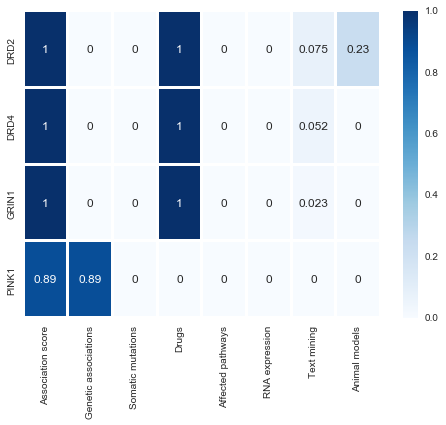

In [58]:
%matplotlib inline
sns.set()
ax = sns.heatmap(df, cmap="Blues", annot=True, linewidths=2)
sns.plt.show()